## Importing Important Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import cv2

## Data Visualisation

In [2]:
def plot_images(direction):  
    list_direction=os.listdir(direction)

    plt.figure(figsize=(16,10))

    for i in range(1,10):
        plt.subplot(3,3,i)
        img=plt.imread(os.path.join(direction,list_direction[i]))
        plt.imshow(img)

#### Glioma Tumor

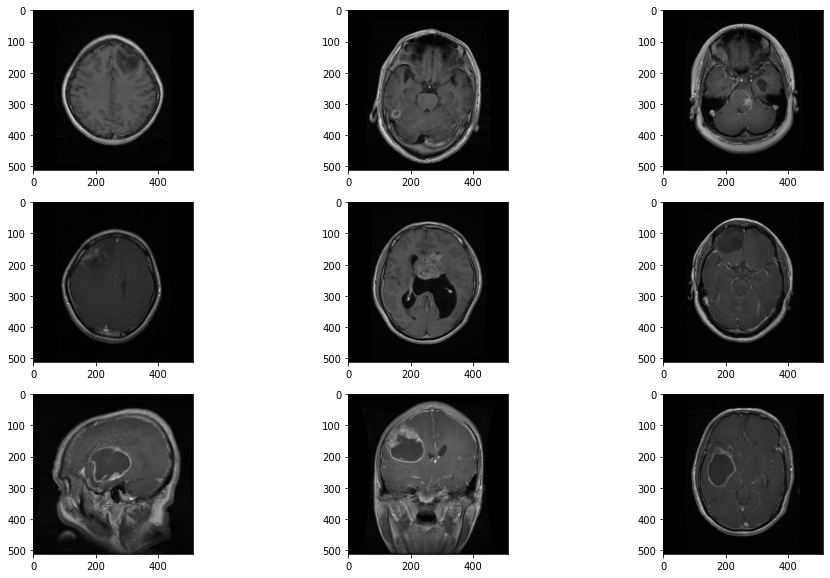

In [3]:
glioma_tumor_dir="../input/brain-tumor-classification-mri/Training/glioma_tumor"
plot_images(glioma_tumor_dir)

#### Meningioma Tumor

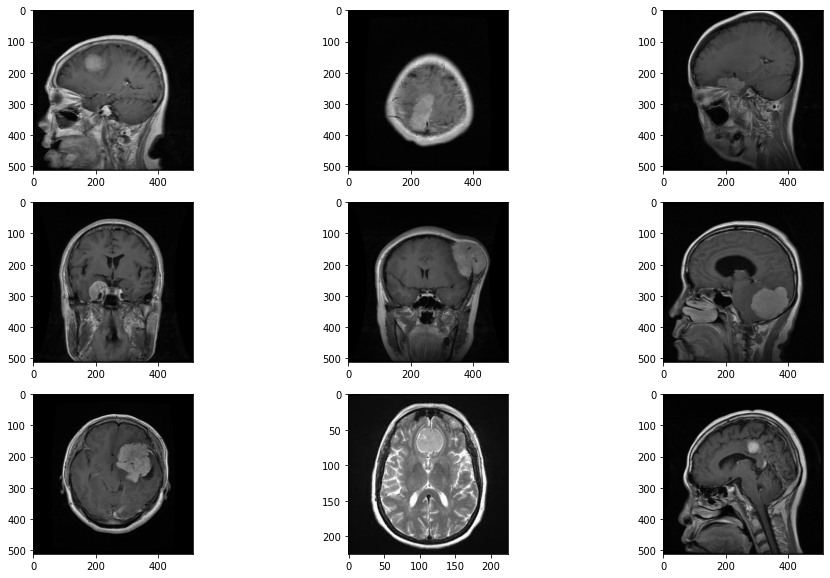

In [4]:
meningioma_tumor_dir="../input/brain-tumor-classification-mri/Training/meningioma_tumor"
plot_images(meningioma_tumor_dir)

#### No Tumor

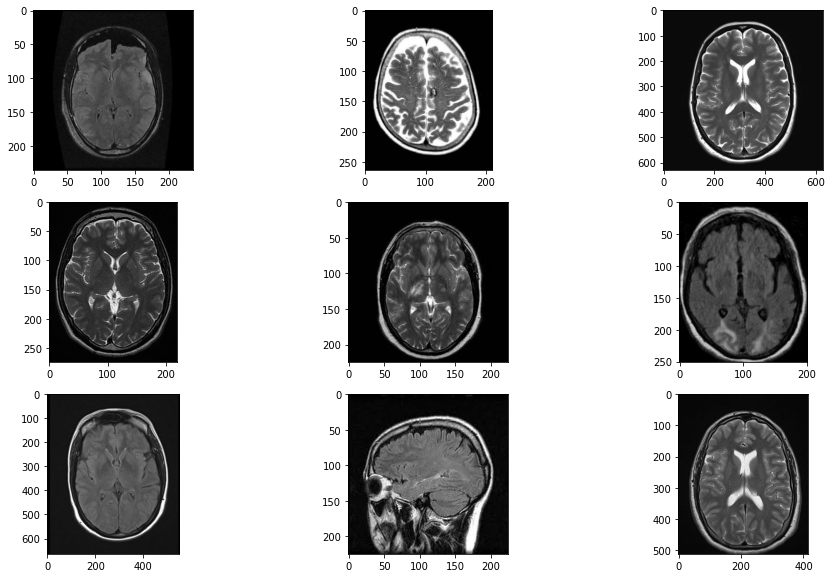

In [5]:
no_tumor_dir="../input/brain-tumor-classification-mri/Training/no_tumor"
plot_images(no_tumor_dir)

#### Pituitary Tumor

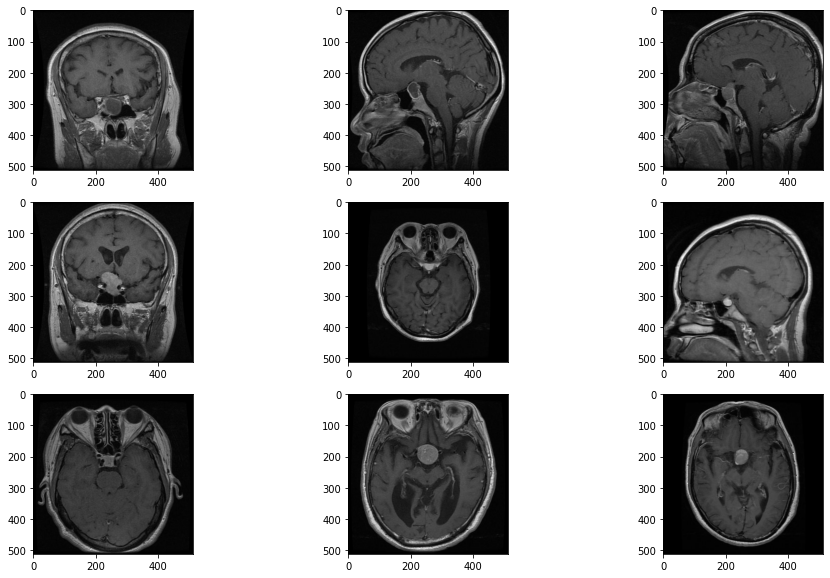

In [6]:
pituitary_tumor_dir="../input/brain-tumor-classification-mri/Training/pituitary_tumor"
plot_images(pituitary_tumor_dir)

## Preprocessing

In [7]:
X_train = []
y_train = []
image_size = 150
labels = ["glioma_tumor","no_tumor","meningioma_tumor","pituitary_tumor"]
for i in labels:
    folderPath = os.path.join("../input/brain-tumor-classification-mri/Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join("../input/brain-tumor-classification-mri/Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
X_train.shape

(3264, 150, 150, 3)

In [9]:
y_train.shape

(3264,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=0)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [14]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

## Model

In [18]:
model = keras.Sequential([
        keras.layers.Conv2D(filters=100, kernel_size=(5,5), activation='relu', input_shape=(150,150, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=500, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="sigmoid")    
    ])

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
92/92 [==============================] - 9s 94ms/step - loss: 1.2337 - accuracy: 0.4501
Epoch 2/50
92/92 [==============================] - 7s 80ms/step - loss: 1.0833 - accuracy: 0.5499
Epoch 3/50
92/92 [==============================] - 7s 80ms/step - loss: 0.9302 - accuracy: 0.6176
Epoch 4/50
92/92 [==============================] - 7s 81ms/step - loss: 0.8150 - accuracy: 0.6806
Epoch 5/50
92/92 [==============================] - 7s 80ms/step - loss: 0.7205 - accuracy: 0.7160
Epoch 6/50
92/92 [==============================] - 7s 80ms/step - loss: 0.6134 - accuracy: 0.7586
Epoch 7/50
92/92 [==============================] - 7s 80ms/step - loss: 0.5657 - accuracy: 0.7814
Epoch 8/50
92/92 [==============================] - 7s 80ms/step - loss: 0.4803 - accuracy: 0.8226
Epoch 9/50
92/92 [==============================] - 7s 80ms/step - loss: 0.4093 - accuracy: 0.8478
Epoch 10/50
92/92 [==============================] - 7s 80ms/step - loss: 0.3879 - accuracy: 0.8563
Epoch 11/

## Evaluate the Model

In [19]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 1s 54ms/step - loss: 0.4964 - accuracy: 0.9021


[0.49643033742904663, 0.9021406769752502]

#### Accuracy of testing dataset is 90.21%